# Import libraries and dataset

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import os

# Import Data
data = pd.read_csv("/workspaces/bakery_sales_prediction/0_DataPreparation/features.csv")
pd.set_option('display.max_columns', None)
# Convert 'Datum' to datetime format
data['Datum'] = pd.to_datetime(data['Datum'], format='%Y-%m-%d')
data.head()  # Print first few rows to verify

,id,Datum,Warengruppe,Umsatz,Bewoelkung,Temperatur,Windgeschwindigkeit,Rain,KielerWoche,CPI,Unemployment,GDP,Rain_Sum_8to18,Rain_8to18,Temp_5d_avg,Temp_above_avg,Temp_below_avg,Wochentag,Wochenende,Monat,Silvester,Schulferien,Temperatureclass_enc,Cloudclass_enc,Windclass_enc,Weather_After_Rain,Weather_Fog,Weather_Other,Weather_Rain,Weather_Showers_and_Thunderstorms,Weather_Snow_and_Ice,Group_brot,Group_brotchen,Group_croissant,Group_konditorei,Group_kuchen,Group_saisonbrot
0,1307011,2013-07-01,1,148.828353,6.0,17.8375,15.0,1.567431,0,93.5,6.8,728.23,1.442231,1,14.4575,1,0,0,0,7,0,1,2,1,2,1,0,0,0,0,0,True,False,False,False,False,False
1,1307021,2013-07-02,1,159.793757,3.0,17.3125,10.0,0.140967,0,93.5,6.8,728.23,0.140967,0,15.4100,0,0,1,0,7,0,1,2,1,2,0,0,1,0,0,0,True,False,False,False,False,False
2,1307031,2013-07-03,1,111.885594,7.0,21.0750,6.0,6.276774,0,93.5,6.8,728.23,5.542491,1,17.0150,1,0,2,0,7,0,1,2,0,0,0,0,0,1,0,0,True,False,False,False,False,False
3,1307041,2013-07-04,1,168.864941,7.0,18.8500,7.0,0.126180,0,93.5,6.8,728.23,0.126180,0,17.8175,0,0,3,0,7,0,1,2,0,0,1,0,0,0,0,0,True,False,False,False,False,False
4,1307051,2013-07-05,1,171.280754,5.0,19.9750,12.0,1.255988,0,93.5,6.8,728.23,1.255988,1,19.0100,0,0,4,0,7,0,1,2,1,2,0,0,1,0,0,0,True,False,False,False,False,False


# Inspect data

In [3]:
data.describe() 

,id,Datum,Warengruppe,Umsatz,Bewoelkung,Temperatur,Windgeschwindigkeit,Rain,KielerWoche,CPI,Unemployment,GDP,Rain_Sum_8to18,Rain_8to18,Temp_5d_avg,Temp_above_avg,Temp_below_avg,Wochentag,Wochenende,Monat,Silvester,Schulferien,Temperatureclass_enc,Cloudclass_enc,Windclass_enc,Weather_After_Rain,Weather_Fog,Weather_Other,Weather_Rain,Weather_Showers_and_Thunderstorms,Weather_Snow_and_Ice
count,1.116400e+04,11164,11164.000000,9334.000000,11164.000000,11164.000000,11164.000000,11164.000000,11164.000000,11164.000000,11164.000000,11164.000000,11164.000000,11164.000000,11164.000000,11164.000000,11164.000000,11164.000000,11164.00000,11164.000000,11164.000000,11164.000000,11164.000000,11164.000000,11164.000000,11164.000000,11164.000000,11164.000000,11164.000000,11164.000000,11164.000000
mean,1.609066e+06,2016-07-13 18:31:28.355428096,3.088678,206.749044,4.753225,12.037294,10.964329,1.838960,0.024006,95.740407,5.971345,802.698701,0.941856,0.239251,12.029694,0.106413,0.080795,3.005106,0.28789,6.658097,0.002418,0.234593,1.226711,0.616446,1.144572,0.151290,0.091723,0.405052,0.317359,0.015407,0.019169
min,1.307011e+06,2013-07-01 00:00:00,1.000000,7.051201,0.000000,-8.475000,1.801104,0.000000,0.000000,93.100000,4.800000,728.230000,0.000000,0.000000,-5.395000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.501043e+06,2015-01-04 00:00:00,2.000000,96.897441,3.000000,6.250000,8.000000,0.000000,0.000000,94.100000,5.400000,755.840000,0.000000,0.000000,6.387500,0.000000,0.000000,1.000000,0.00000,4.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.607148e+06,2016-07-14 12:00:00,3.000000,161.900831,6.000000,11.625000,10.000000,0.232078,0.000000,95.100000,6.000000,803.380000,0.000000,0.000000,11.635000,0.000000,0.000000,3.000000,0.00000,7.000000,0.000000,0.000000,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.801174e+06,2018-01-17 00:00:00,4.000000,280.644663,7.000000,17.865625,13.000000,2.340435,0.000000,97.000000,6.500000,847.260000,0.920094,0.000000,18.000000,0.000000,0.000000,5.000000,1.00000,10.000000,0.000000,0.000000,2.000000,1.000000,2.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
max,1.907305e+06,2019-07-30 00:00:00,6.000000,1879.461831,8.000000,32.671428,35.000000,40.228697,1.000000,100.300000,7.300000,891.830000,26.715723,1.000000,28.347500,1.000000,1.000000,6.000000,1.00000,12.000000,1.000000,1.000000,3.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
std,1.791961e+05,NaN,1.488413,144.545189,2.635712,7.196683,4.155144,3.419483,0.153074,1.912069,0.663198,49.220730,2.031688,0.426645,6.884985,0.308380,0.272533,2.003015,0.45280,3.467332,0.049121,0.423763,0.777448,0.486273,0.971541,0.358347,0.288648,0.490924,0.465469,0.123169,0.137124


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11164 entries, 0 to 11163
Data columns (total 37 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   id                                 11164 non-null  int64         
 1   Datum                              11164 non-null  datetime64[ns]
 2   Warengruppe                        11164 non-null  int64         
 3   Umsatz                             9334 non-null   float64       
 4   Bewoelkung                         11164 non-null  float64       
 5   Temperatur                         11164 non-null  float64       
 6   Windgeschwindigkeit                11164 non-null  float64       
 7   Rain                               11164 non-null  float64       
 8   KielerWoche                        11164 non-null  int64         
 9   CPI                                11164 non-null  float64       
 10  Unemployment                      

In [5]:
data.iloc[:,20:].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11164 entries, 0 to 11163
Data columns (total 17 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Silvester                          11164 non-null  int64
 1   Schulferien                        11164 non-null  int64
 2   Temperatureclass_enc               11164 non-null  int64
 3   Cloudclass_enc                     11164 non-null  int64
 4   Windclass_enc                      11164 non-null  int64
 5   Weather_After_Rain                 11164 non-null  int64
 6   Weather_Fog                        11164 non-null  int64
 7   Weather_Other                      11164 non-null  int64
 8   Weather_Rain                       11164 non-null  int64
 9   Weather_Showers_and_Thunderstorms  11164 non-null  int64
 10  Weather_Snow_and_Ice               11164 non-null  int64
 11  Group_brot                         11164 non-null  bool 
 12  Group_brotchen    

In [6]:
numeric_features = ['GDP', 'Unemployment' 'CPI']
categorical_features = ['Warengruppe', 'Wochentag', 'Monat'
                        , 'Temperatureclass_enc', 'Cloudclass_enc', 'Windclass_enc']
dummy_features = ['KielerWoche', 'Schulferien', 'Silvester'
                ,  'Weather_After_Rain', 'Weather_Fog', 'Weather_Rain', 'Weather_Other', 'Weather_Showers_and_Thunderstorms', 'Weather_Snow_and_Ice']

In [7]:
# Inspect data types and unique values for categorical columns
print(data[categorical_features].dtypes)
print("Unique Values:\n",data[categorical_features].apply(lambda x: x.unique()))


Warengruppe             int64
Wochentag               int64
Monat                   int64
Temperatureclass_enc    int64
Cloudclass_enc          int64
Windclass_enc           int64
dtype: object
Unique Values:
 Warengruppe                                  [1, 2, 3, 4, 5, 6]
Wochentag                                 [0, 1, 2, 3, 4, 5, 6]
Monat                   [7, 8, 9, 10, 11, 12, 1, 2, 3, 4, 5, 6]
Temperatureclass_enc                               [2, 3, 1, 0]
Cloudclass_enc                                           [1, 0]
Windclass_enc                                         [2, 0, 1]
dtype: object


In [8]:
# Ensure categorical columns are treated as categories
for col in categorical_features:
    data[col] = data[col].astype('category')

# Encode categorical variables with more than 2 unique values
data = pd.get_dummies(data, columns=categorical_features, drop_first=True)

In [9]:
data

,id,Datum,Umsatz,Bewoelkung,Temperatur,Windgeschwindigkeit,Rain,KielerWoche,CPI,Unemployment,GDP,Rain_Sum_8to18,Rain_8to18,Temp_5d_avg,Temp_above_avg,Temp_below_avg,Wochenende,Silvester,Schulferien,Weather_After_Rain,Weather_Fog,Weather_Other,Weather_Rain,Weather_Showers_and_Thunderstorms,Weather_Snow_and_Ice,Group_brot,Group_brotchen,Group_croissant,Group_konditorei,Group_kuchen,Group_saisonbrot,Warengruppe_2,Warengruppe_3,Warengruppe_4,Warengruppe_5,Warengruppe_6,Wochentag_1,Wochentag_2,Wochentag_3,Wochentag_4,Wochentag_5,Wochentag_6,Monat_2,Monat_3,Monat_4,Monat_5,Monat_6,Monat_7,Monat_8,Monat_9,Monat_10,Monat_11,Monat_12,Temperatureclass_enc_1,Temperatureclass_enc_2,Temperatureclass_enc_3,Cloudclass_enc_1,Windclass_enc_1,Windclass_enc_2
0,1307011,2013-07-01,148.828353,6.0,17.8375,15.0,1.567431,0,93.5,6.8,728.23,1.442231,1,14.4575,1,0,0,0,1,1,0,0,0,0,0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,True,False,True
1,1307021,2013-07-02,159.793757,3.0,17.3125,10.0,0.140967,0,93.5,6.8,728.23,0.140967,0,15.4100,0,0,0,0,1,0,0,1,0,0,0,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,True,False,True
2,1307031,2013-07-03,111.885594,7.0,21.0750,6.0,6.276774,0,93.5,6.8,728.23,5.542491,1,17.0150,1,0,0,0,1,0,0,0,1,0,0,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False
3,1307041,2013-07-04,168.864941,7.0,18.8500,7.0,0.126180,0,93.5,6.8,728.23,0.126180,0,17.8175,0,0,0,0,1,1,0,0,0,0,0,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False
4,1307051,2013-07-05,171.280754,5.0,19.9750,12.0,1.255988,0,93.5,6.8,728.23,1.255988,1,19.0100,0,0,0,0,1,0,0,1,0,0,0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11159,1812226,2018-12-22,NaN,8.0,4.3000,4.0,0.392234,0,98.5,4.9,881.52,0.243416,0,4.7575,0,0,1,0,1,0,0,1,0,0,0,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
11160,1812236,2018-12-23,NaN,7.0,6.4500,9.0,4.244212,0,98.5,4.9,881.52,1.981295,1,4.9850,0,0,1,0,1,0,0,0,1,0,0,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False
11161,1812246,2018-12-24,NaN,7.0,2.5000,10.0,0.000000,0,98.5,4.9,881.52,0.000000,0,4.8500,0,0,0,0,1,1,0,0,0,0,0,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True
11162,1812276,2018-12-27,NaN,7.0,7.1250,12.0,0.000000,0,98.5,4.9,881.52,0.000000,0,6.0700,0,0,0,0,1,1,0,0,0,0,0,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,True


In [10]:
# Drop unnecessary columns
columns_to_drop = ['Bewoelkung', 'Temperatur', 'Windgeschwindigkeit']
prepared_data = data.drop(columns=columns_to_drop)  

# Handle missing values by removing rows with any missing values
# prepared_data = prepared_data.dropna()

# Display the shape of the prepared data set
print(prepared_data.shape)

# Set id as index 
prepared_data.set_index('id', inplace=True)

# Display the first few rows of the prepared data set
prepared_data.head()

(11164, 56)


,Datum,Umsatz,Rain,KielerWoche,CPI,Unemployment,GDP,Rain_Sum_8to18,Rain_8to18,Temp_5d_avg,Temp_above_avg,Temp_below_avg,Wochenende,Silvester,Schulferien,Weather_After_Rain,Weather_Fog,Weather_Other,Weather_Rain,Weather_Showers_and_Thunderstorms,Weather_Snow_and_Ice,Group_brot,Group_brotchen,Group_croissant,Group_konditorei,Group_kuchen,Group_saisonbrot,Warengruppe_2,Warengruppe_3,Warengruppe_4,Warengruppe_5,Warengruppe_6,Wochentag_1,Wochentag_2,Wochentag_3,Wochentag_4,Wochentag_5,Wochentag_6,Monat_2,Monat_3,Monat_4,Monat_5,Monat_6,Monat_7,Monat_8,Monat_9,Monat_10,Monat_11,Monat_12,Temperatureclass_enc_1,Temperatureclass_enc_2,Temperatureclass_enc_3,Cloudclass_enc_1,Windclass_enc_1,Windclass_enc_2
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1307011,2013-07-01,148.828353,1.567431,0,93.5,6.8,728.23,1.442231,1,14.4575,1,0,0,0,1,1,0,0,0,0,0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,True,False,True
1307021,2013-07-02,159.793757,0.140967,0,93.5,6.8,728.23,0.140967,0,15.4100,0,0,0,0,1,0,0,1,0,0,0,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,True,False,True
1307031,2013-07-03,111.885594,6.276774,0,93.5,6.8,728.23,5.542491,1,17.0150,1,0,0,0,1,0,0,0,1,0,0,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False
1307041,2013-07-04,168.864941,0.126180,0,93.5,6.8,728.23,0.126180,0,17.8175,0,0,0,0,1,1,0,0,0,0,0,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False
1307051,2013-07-05,171.280754,1.255988,0,93.5,6.8,728.23,1.255988,1,19.0100,0,0,0,0,1,0,0,1,0,0,0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,True,False,True


In [11]:
prepared_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11164 entries, 1307011 to 1812286
Data columns (total 55 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   Datum                              11164 non-null  datetime64[ns]
 1   Umsatz                             9334 non-null   float64       
 2   Rain                               11164 non-null  float64       
 3   KielerWoche                        11164 non-null  int64         
 4   CPI                                11164 non-null  float64       
 5   Unemployment                       11164 non-null  float64       
 6   GDP                                11164 non-null  float64       
 7   Rain_Sum_8to18                     11164 non-null  float64       
 8   Rain_8to18                         11164 non-null  int64         
 9   Temp_5d_avg                        11164 non-null  float64       
 10  Temp_above_avg                 

# Split dataset

In [12]:
train_end_date = '2017-07-31'
validation_end_date = '2018-07-31'


train_data = prepared_data[prepared_data['Datum']<=train_end_date]
vali_data = prepared_data[(prepared_data['Datum']> train_end_date) & (prepared_data['Datum']<=validation_end_date)]
test_data = prepared_data[(prepared_data['Datum']> validation_end_date)]


In [13]:
# Separating features and labels
train_features = train_data.drop(columns=['Umsatz', 'Datum'])
training_features = train_data.drop(columns = ['Umsatz', 'Datum'], axis=1)
validation_features = vali_data.drop(columns = ['Umsatz', 'Datum'], axis=1)
test_features = test_data.drop(columns = ['Umsatz', 'Datum'], axis=1)


training_labels = train_data[['Umsatz']]
validation_labels = vali_data[['Umsatz']]
test_labels = test_data[['Umsatz']]

# Handling missing values 

In [14]:
prepared_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11164 entries, 1307011 to 1812286
Data columns (total 55 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   Datum                              11164 non-null  datetime64[ns]
 1   Umsatz                             9334 non-null   float64       
 2   Rain                               11164 non-null  float64       
 3   KielerWoche                        11164 non-null  int64         
 4   CPI                                11164 non-null  float64       
 5   Unemployment                       11164 non-null  float64       
 6   GDP                                11164 non-null  float64       
 7   Rain_Sum_8to18                     11164 non-null  float64       
 8   Rain_8to18                         11164 non-null  int64         
 9   Temp_5d_avg                        11164 non-null  float64       
 10  Temp_above_avg                 

# Train neural network

In [15]:
# pip install --upgrade pip
# pip install tensorflow>=2.12.0 numpy>=1.21.0

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, BatchNormalization
from tensorflow.keras.optimizers import Adam

2025-07-01 12:39:56.101824: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-07-01 12:39:56.102562: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-07-01 12:39:56.105691: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-07-01 12:39:56.114372: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1751373596.131163   56795 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1751373596.13

In [17]:
# Architecture 1
# model = Sequential([
#   InputLayer(shape=(training_features.shape[1], )),
#   BatchNormalization(),
#   Dense(10, activation='relu'),
#   Dense(4, activation='relu'),
#   Dense(1, activation='relu')
# ])

# Architecture 2
# from tensorflow.keras.layers import Dropout
# from tensorflow.keras.layers import Dense, InputLayer, BatchNormalization
# model = Sequential([
#     InputLayer(shape=(training_features.shape[1], )),
#     BatchNormalization(),
#     Dense(64, activation='relu'),
#     Dropout(0.2),
#     Dense(32, activation='relu'),
#     Dense(1)  # No activation
# ])

# Architecture 3
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense, InputLayer, BatchNormalization
model = Sequential([
    InputLayer(shape=(training_features.shape[1], )),
    BatchNormalization(),
    # Dropout(0.1),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(4, activation='relu'),
    Dense(1)  # No activation
])

model.summary()


2025-07-01 12:40:00.494847: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ batch_normalization             │ (None, 53)             │           212 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         3,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,885 (22.99 KB)

 Trainable params: 5,779 (22.57 KB)

 Non-trainable params: 106 (424.00 B)

In [18]:
from tensorflow.keras.losses import Huber
model.compile(loss="mae", optimizer=Adam(learning_rate=0.001))

history = model.fit(training_features, training_labels, epochs=100, batch_size=32,
                    validation_data=(validation_features, validation_labels))

Epoch 1/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 187.0501 - val_loss: 64.2253
Epoch 2/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 61.9801 - val_loss: 41.3644
Epoch 3/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 53.6366 - val_loss: 38.9574
Epoch 4/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 51.8024 - val_loss: 37.1771
Epoch 5/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 52.3239 - val_loss: 35.5443
Epoch 6/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 52.0095 - val_loss: 34.6067
Epoch 7/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 48.7927 - val_loss: 34.3989
Epoch 8/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 49.9488 - val_loss: 34.1569
Epoch 9/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 49.3868 - val_loss: 33.0984
Epoch 10/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 48.7611 - val_loss: 32.9087
Epoch 11/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 46.7063 - val_loss: 35.7200
Epoch 12/100
235/2

In [19]:
model.save("python_model.h5")

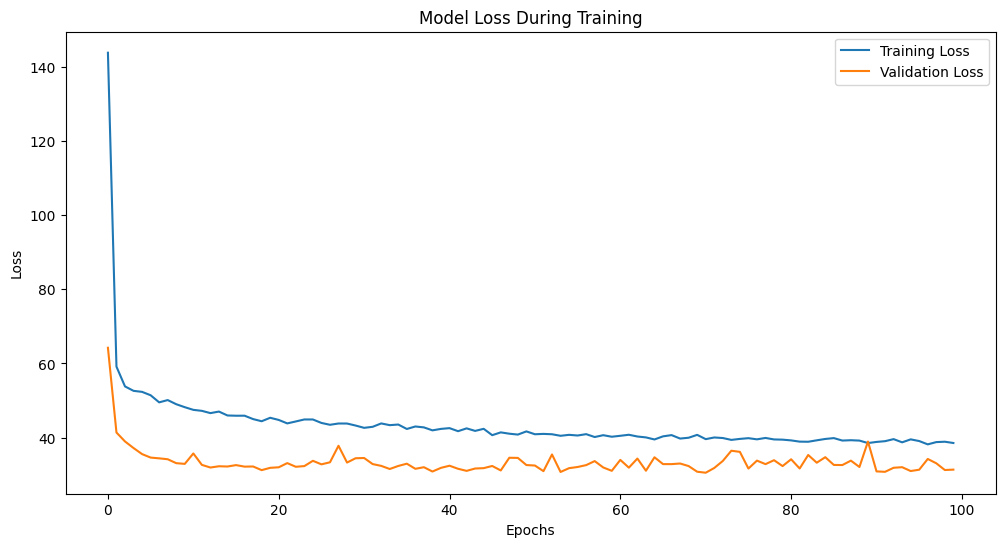

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [24]:
import numpy as np

def mape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    non_zero_mask = y_true != 0
    return np.mean(np.abs((y_true[non_zero_mask] - y_pred[non_zero_mask]) / y_true[non_zero_mask])) * 100

training_predictions = model.predict(training_features)
validation_predictions = model.predict(validation_features)

print(f"MAPE on the Training Data: {mape(training_labels, training_predictions):.2f}%")
print(f"MAPE on the Validation Data: {mape(validation_labels, validation_predictions):.2f}%")


219/235 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


: 

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


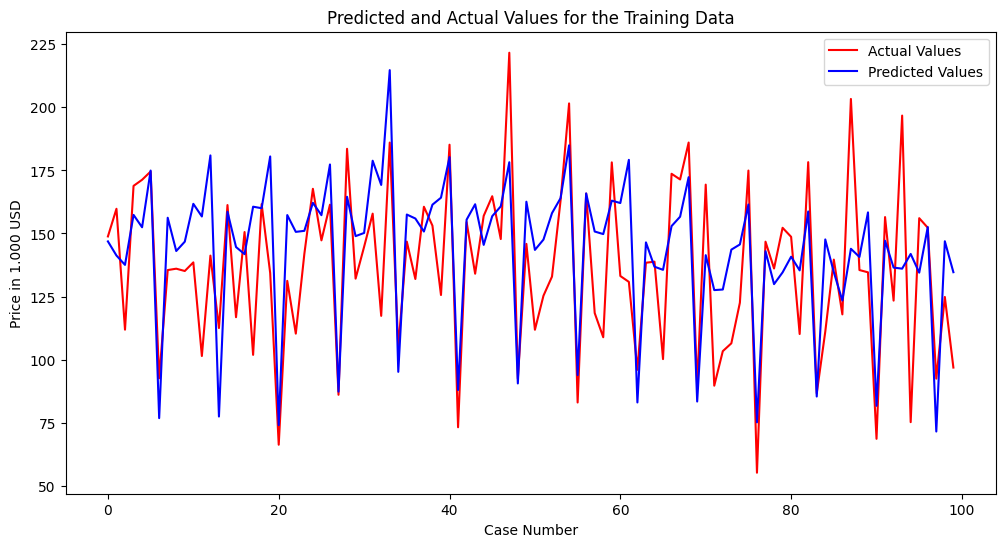

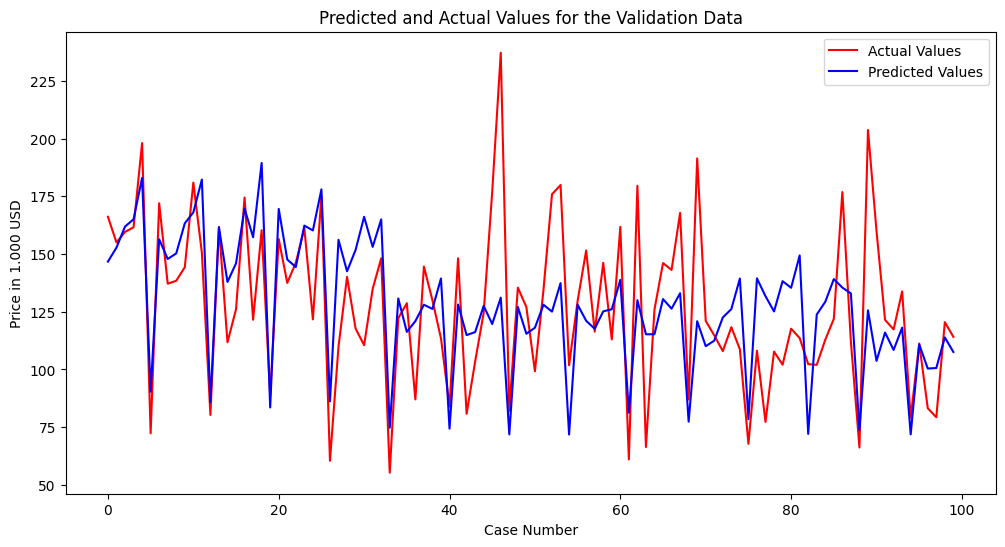

In [ ]:
def plot_predictions(data, title):
    plt.figure(figsize=(12, 6))
    plt.plot(data['actual'], label='Actual Values', color='red')
    plt.plot(data['prediction'], label='Predicted Values', color='blue')
    plt.title(title)
    plt.xlabel('Case Number')
    plt.ylabel('Price in 1.000 USD')
    plt.legend()
    plt.show()

# Ensure that training_predictions, validation_predictions, training_labels, and validation_labels are numpy arrays
training_predictions = np.array(training_predictions).flatten()
validation_predictions = np.array(validation_predictions).flatten()
test_predictions = np.array(training_predictions).flatten()
training_labels = np.array(training_labels).flatten()
validation_labels = np.array(validation_labels).flatten()

# print the type of the predictions
print(type(training_predictions))
print(type(validation_predictions))

# Create DataFrames with 1-dimensional arrays
data_train = pd.DataFrame({'prediction': training_predictions, 'actual': training_labels})
data_validation = pd.DataFrame({'prediction': validation_predictions, 'actual': validation_labels})

# Plot predictions
plot_predictions(data_train.head(100), 'Predicted and Actual Values for the Training Data')
plot_predictions(data_validation.head(100), 'Predicted and Actual Values for the Validation Data')

# Predict 

In [ ]:
pred_test = model.predict(test_features)

In [46]:
import pandas as pd

# Create the final prediction DataFrame
final_predictions = pd.DataFrame({
    'id': test_data.index,  # Use the index from test_data as id
    'Umsatz': pred_test.flatten()  # Flatten the predictions array to 1D
})

# Set id as index if you want it as index instead of a column
# final_predictions.set_index('id', inplace=True)

print(final_predictions.head())

        id      Umsatz
0  1808011  170.862930
1  1808021  203.770798
2  1808031  190.254257
3  1808041  222.798630
4  1808051  157.557861


In [47]:
final_predictions

,id,Umsatz
0,1808011,170.862930
1,1808021,203.770798
2,1808031,190.254257
3,1808041,222.798630
4,1808051,157.557861
...,...,...
1825,1812226,93.709770
1826,1812236,100.632469
1827,1812246,88.187691
1828,1812276,103.333801


In [48]:
final_predictions.to_csv("neural_network1.csv", index=False) 